Q1 

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [1]:
import numpy as np

# Set the seed for the random number generator
np.random.seed(1)

# Generate 100 observations from a normal distribution N(0, 1)
x = np.random.normal(0, 1, 100)

# Display the first 10 values to verify the output
print(x[:10])


[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [2]:
# Generate 100 observations from a normal distribution N(0, 0.25)
eps = np.random.normal(0, np.sqrt(0.25), 100)

# Display the first 10 values to verify the output
print(eps[:10])

[-0.22356428  0.61225385  0.20174582  0.29678926 -0.54745592  0.08469122
  0.37027823 -0.4768503  -0.13310925  0.01630727]


(c) Using x and eps, generate a vector y according to the model

Y = −1+0.5X + e. (3.39)

What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [3]:
y = -1 + 0.5 * x + eps

# Get the length of vector y
length_of_y = len(y)

# Display the length of y and the first 10 values
print(length_of_y, y[:10])

100 [-0.4113916  -0.69362435 -1.06234006 -1.23969505 -1.11475211 -2.06607813
  0.24268411 -1.85745375 -0.9735897  -1.10837791]


(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

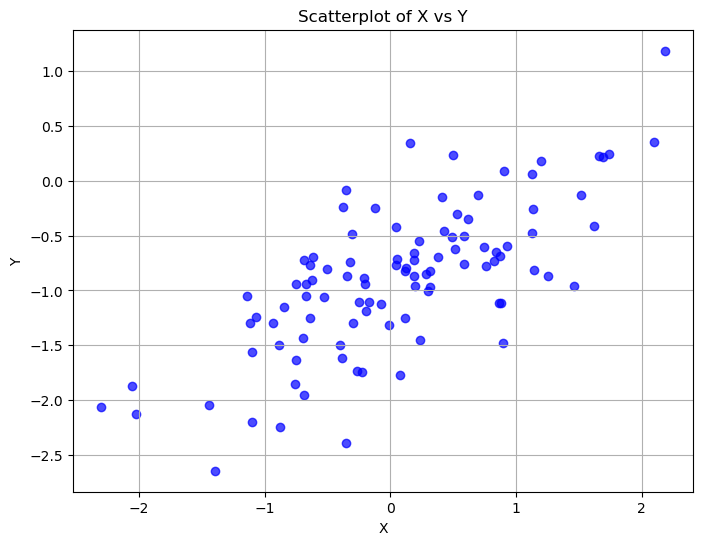

In [4]:
import matplotlib.pyplot as plt

# Create a scatterplot of x vs y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.title('Scatterplot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


Observation
 - There is a clear positive linear relationship between X and y, with some variability due to the random noise (ε) added to the model.

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?

In [5]:
import statsmodels.api as sm

# Add a constant to the x values (for the intercept)
x_with_const = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x_with_const).fit()

# Get the estimated coefficients
beta_0_hat, beta_1_hat = model.params

# Display the estimated coefficients
print(beta_0_hat, beta_1_hat)


c:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


-0.9264932351508992 0.5477135668255857


The fitted least squares linear model produced the following estimated coefficients:
- β0 head = -0.93
- β1 head = 0.55

Comparing these to the true values of β0 = −1 and β1 = 0.5, we observe that the estimates are quite close to the true values. The small deviations are due to the random noise (𝜀) added in the model.

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a diferent
color. Use the legend() method of the axes to create an appropriate legend.

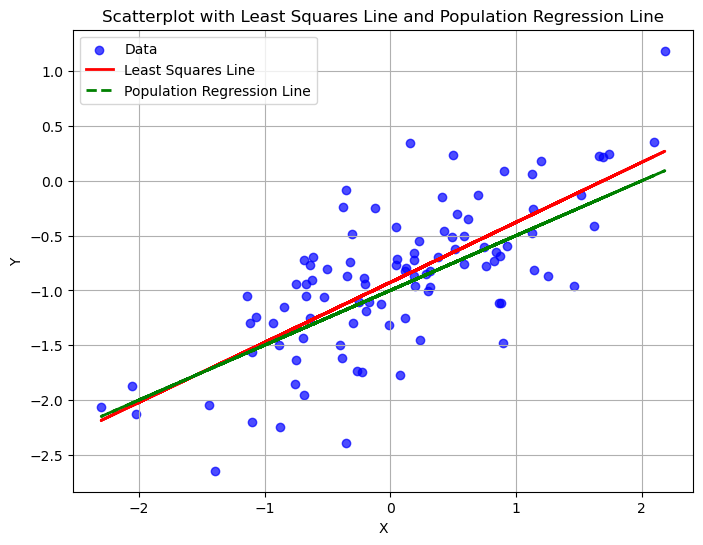

In [6]:
# Generate predictions using the fitted model (least squares line)
y_pred = beta_0_hat + beta_1_hat * x

# Generate the population regression line (true line)
y_true = -1 + 0.5 * x

# Create the scatterplot and overlay both lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.plot(x, y_pred, color='red', label='Least Squares Line', linewidth=2)
plt.plot(x, y_true, color='green', label='Population Regression Line', linewidth=2, linestyle='--')

# Add labels, title, and legend
plt.title('Scatterplot with Least Squares Line and Population Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


(g) Now fit a polynomial regression model that predicts y using x
and x square. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [7]:
# Add a quadratic term (x^2) to the model
x_squared = x ** 2
x_poly = np.column_stack((x, x_squared))

# Add a constant to the polynomial features for the intercept
x_poly_with_const = sm.add_constant(x_poly)

# Fit the polynomial regression model
poly_model = sm.OLS(y, x_poly_with_const).fit()

# Display the summary of the polynomial model
print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.83e-16
Time:                        18:11:09   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

The polynomial regression model, which includes both X and X square, provides the following results for the quadratic term x square:

- The coefficient for the quadratic term x square is 0.0077, with a p-value of 0.856, which is much larger than the standard significance level (e.g., 0.05).
- The R-squared value of the model is 0.522, only a slight improvement from the linear model, but the quadratic term itself is not statistically significant.


Since the p-value for the quadratic term is much greater than 0.05, we can conclude that there is no significant evidence that the quadratic term improves the model fit. The linear model appears to be sufficient for this data.

(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
" in (b). Describe your results.

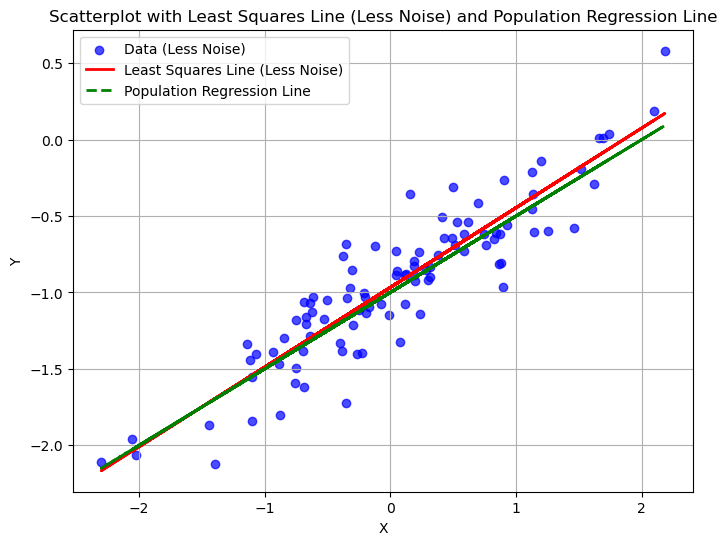

Estimated coefficients (less noise): β0 = -0.9671267753982636, β1 = 0.5213381557741976


In [8]:
# Set the seed for reproducibility
np.random.seed(1)

# (h) (a) Generate x with 100 observations from N(0, 1)
x = np.random.normal(0, 1, 100)

# (h) (b) Generate eps with less variance (0.05 instead of 0.25)
eps_less_noise = np.random.normal(0, np.sqrt(0.05), 100)

# (h) (c) Generate y using the modified eps with less noise
y_less_noise = -1 + 0.5 * x + eps_less_noise

# (h) (d) Fit a least squares linear model to predict y_less_noise using x
x_with_const = sm.add_constant(x)  # Add a constant for the intercept
model_less_noise = sm.OLS(y_less_noise, x_with_const).fit()

# Get the estimated coefficients
beta_0_hat_less_noise, beta_1_hat_less_noise = model_less_noise.params

# Generate predictions using the fitted model with less noise
y_pred_less_noise = beta_0_hat_less_noise + beta_1_hat_less_noise * x

# (h) (f) Generate the population regression line (true line)
y_true = -1 + 0.5 * x

# Create the scatterplot and overlay both lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y_less_noise, color='blue', alpha=0.7, label='Data (Less Noise)')
plt.plot(x, y_pred_less_noise, color='red', label='Least Squares Line (Less Noise)', linewidth=2)
plt.plot(x, y_true, color='green', label='Population Regression Line', linewidth=2, linestyle='--')

# Add labels, title, and legend
plt.title('Scatterplot with Least Squares Line (Less Noise) and Population Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Display the estimated coefficients
print(f"Estimated coefficients (less noise): β0 = {beta_0_hat_less_noise}, β1 = {beta_1_hat_less_noise}")


Reducing the noise improves the accuracy of the parameter estimates and produces a clearer relationship between 𝑋 and Y. The model becomes more precise as the data is less affected by random errors.

(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.

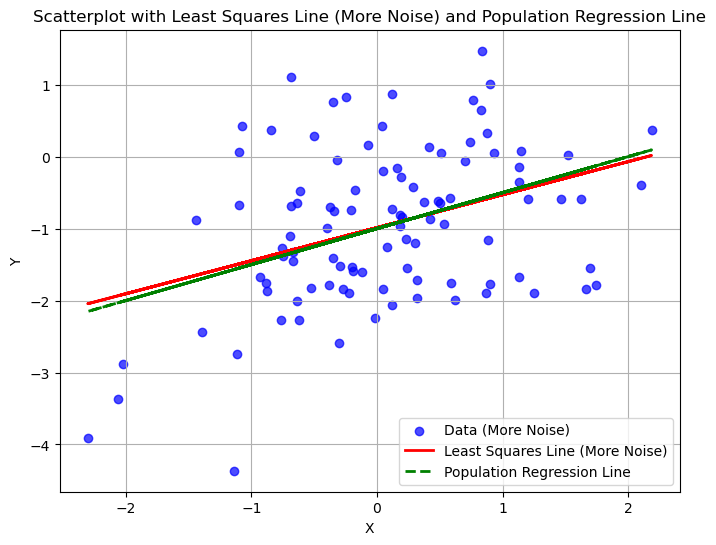

Estimated coefficients (more noise): β0 = -0.9876906526584724, β1 = 0.45894130940163924


In [9]:
# (i) Modify the noise term eps with more variance (variance = 1)
eps_more_noise = np.random.normal(0, np.sqrt(1), 100)

# (i) Generate y using the modified eps with more noise
y_more_noise = -1 + 0.5 * x + eps_more_noise

# (i) Fit a least squares linear model to predict y_more_noise using x
x_with_const = sm.add_constant(x)  # Add a constant for the intercept
model_more_noise = sm.OLS(y_more_noise, x_with_const).fit()

# Get the estimated coefficients
beta_0_hat_more_noise, beta_1_hat_more_noise = model_more_noise.params

# Generate predictions using the fitted model with more noise
y_pred_more_noise = beta_0_hat_more_noise + beta_1_hat_more_noise * x

# Generate the population regression line (true line)
y_true = -1 + 0.5 * x

# Create the scatterplot and overlay both lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y_more_noise, color='blue', alpha=0.7, label='Data (More Noise)')
plt.plot(x, y_pred_more_noise, color='red', label='Least Squares Line (More Noise)', linewidth=2)
plt.plot(x, y_true, color='green', label='Population Regression Line', linewidth=2, linestyle='--')

# Add labels, title, and legend
plt.title('Scatterplot with Least Squares Line (More Noise) and Population Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Display the estimated coefficients
print(f"Estimated coefficients (more noise): β0 = {beta_0_hat_more_noise}, β1 = {beta_1_hat_more_noise}")


These estimates deviate more from the true values compared to the original model, indicating that the higher noise level has introduced more variability into the estimates.

(j) What are the confdence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [10]:
# Confidence intervals for the original data set
conf_int_original = model.conf_int()

# Confidence intervals for the less noisy data set
conf_int_less_noise = model_less_noise.conf_int()

# Confidence intervals for the more noisy data set
conf_int_more_noise = model_more_noise.conf_int()

# Display the confidence intervals
print("Confidence intervals (Original Data Set):")
print(conf_int_original)

print("\nConfidence intervals (Less Noisy Data Set):")
print(conf_int_less_noise)

print("\nConfidence intervals (More Noisy Data Set):")
print(conf_int_more_noise)


Confidence intervals (Original Data Set):
[[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]

Confidence intervals (Less Noisy Data Set):
[[-1.00882843 -0.92542512]
 [ 0.47433592  0.56834039]]

Confidence intervals (More Noisy Data Set):
[[-1.18948092 -0.78590038]
 [ 0.23150204  0.68638058]]


Comments on the Results:
- Original Data Set: The confidence intervals are relatively narrow, reflecting moderate noise in the data. The true values fall within the intervals.

- Less Noisy Data Set: The confidence intervals are tighter compared to the original data, indicating higher precision in the estimates due to reduced noise. The intervals are close to the true values, showing that less noise improves the accuracy of the model.

- More Noisy Data Set: The confidence intervals are much wider, especially for β1 , indicating less precision in the estimates. This reflects the greater uncertainty introduced by the increased noise, and the intervals deviate further from the true parameter values.